## Logistic Regression
<p> Based on Andrew Ng's lecture on Stanford Machine Learning</p>
<p> A dataset has grades of students for 2 exams (exam-1 and exam-2) and is used to predict if the student can be admitted or not in the university.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# importing dataset
df = pd.read_csv('data/ex2data1.csv')
df.head()

,grade1,grade2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# extracting the training data to save into arrays
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2:3].values

Text(0, 0.5, 'Grades for Exam-2')

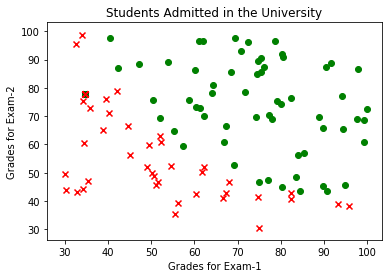

In [4]:
# plotting the training examples
# find indeces for positive and negative examples
pos = np.where(y == 1)
neg = np.where(y == 0)

plt.scatter(X[pos, 0], X[pos, 1], color='green', marker='o')
plt.scatter(X[neg, 0], X[neg, 1], color='red', marker='x')
plt.title('Students Admitted in the University')
plt.xlabel('Grades for Exam-1')
plt.ylabel('Grades for Exam-2')

In [5]:
# setting up the data matrix: m = no. of training examples, n = no. of features
m = X.shape[0]

# adding 1's to X
X_train = np.concatenate((np.ones((m, 1)), X), axis=1)


In [6]:
# sigmoid function
import math
def sigmoid(z):
    g = 1 / (1 + math.exp(-z))
    return g

In [7]:
# fuction to calculate cost function (J) and gradient
def costFunction(X, y, theta):
    [m, n] = X.shape
    grad = np.zeros((theta.size))
    J = 0
    for i in range(m):
        z = X[i, :].dot(theta)
        h = sigmoid(z)
        J -= (1/m) * (-y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h))
    
    for j in range(n):
        for i in range(m):
            z = X[i, :].dot(theta)
            h = sigmoid(z)
            grad[j] -= -(1/m) * ((h - y[i]) * X[i, j])
    return (J, grad)

In [8]:
# initial value of theta
n = X_train.shape[1]
initial_theta = np.zeros((n, 1))

# initialize grad vector
grad = np.zeros((initial_theta.size))

# calculate cost function and gradient descent
(J, grad) = costFunction(X_train, y, initial_theta)

# using intital theta
print('At initial_theta:')
print('Cost function, J:', J)
print('Gradient descent:', grad)

# using test_theta
test_theta = np.array([[-24], [0.2], [0.2]])
[J, grad] = costFunction(X_train, y, test_theta)
print('Using test_theta:')
print('Cost function, J:', J)
print('Gradient descent:', grad)


At initial_theta:
Cost function, J: [-0.69314718]
Gradient descent: [ -0.1        -12.00921659 -11.26284221]
Using test_theta:
Cost function, J: [-0.21833019]
Gradient descent: [0.04290299 2.56623412 2.64679737]


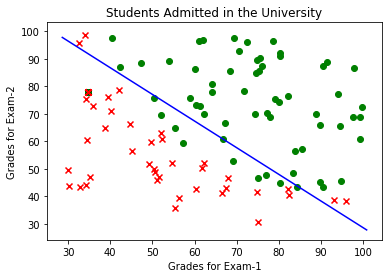

In [9]:
# plotting the training examples
# find indeces for positive and negative examples
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], color='green', marker='o')
plt.scatter(X[neg, 0], X[neg, 1], color='red', marker='x')
plt.title('Students Admitted in the University')
plt.xlabel('Grades for Exam-1')
plt.ylabel('Grades for Exam-2')

# plotting the decision boundary
xp = np.array([[min(X[:, 1])-2, max(X[:, 1])+2]]).T
yp = (1/grad[2])*(grad[1]*xp + grad[0])
temp0 = yp[0,0]
temp1 = yp[1,0]
ynew = np.array([[temp1], [temp0]])
plt.plot(xp, ynew, color='blue')


In [10]:
# predicting the probability
def predict(X, theta):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        a = X[i, :]
        z = a.dot(theta)
        probability = sigmoid(z)
        if (probability >= 0.5):
            p[i,0] = 1.0
        else:
            p[i,0] = 0.0
    return p
                
# predict using the example : [1, 45, 85]
x1 = np.array([[1, 45, 85]])
p = predict(x1, grad) 
print(p)

[[1.]]


### Using scikit-Learn

In [11]:

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y.reshape(m))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# predict values for the testing data
predictions = logmodel.predict(X_train)
print(predictions)

[0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]


In [13]:
# create classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.88      0.98      0.93        60

    accuracy                           0.91       100
   macro avg       0.93      0.89      0.90       100
weighted avg       0.92      0.91      0.91       100

[[32  8]
 [ 1 59]]
